In [60]:
%load_ext autoreload
%autoreload 2

import os
from datetime import datetime

#import numpy as np 
#import numpyro
import pandas as pd

from modeller import Modeller

import seaborn as sns
#import matplotlib.pyplot as plt 

#from smoother import Smoother

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from modeller import VariableGroup

In [44]:
spec_new = {
    "name": "Sales",
    "seasonality": {                # нет сезонности если нет секции
        "include": True,
        "cycle": 52,                # int, [2-52]
        "model": "fourier",        # ['fourier', 'discrete']
        "num_fouries_terms": None   # int / None
    },
    "y": "Volume",
    "X": [
        {
            "name": "Own media", 
            "type": "media",
            "scaling": "total",
            "saturation": True,
            "variables": [
                {"name": "TV", "column": "CH TV",                        "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "OLV",   "column": "CH OLV",                    "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "OOH", "column": "CH OOH",                      "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "Radio",    "column": "CH RADIO",               "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "Projects & bloggers", "column": "CH SP&BLOGG", "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": True},
                {"name": "Banners", "column": "CH BANN",                 "rolling": 1, "retention": (1, 3), "beta": 1, "force_positive": True},
                {"name": "E-com", "column": "CH ECOM",                   "rolling": 1, "retention": (1, 3), "beta": 1, "force_positive": True},
            ]
        }, 
        {
            "name": "Competitors media", 
            "type": "media",
            "scaling": "total",
            "saturation": False,
            "variables": [
                {"name": "Actimuno ads", "column": "Compets Actimuno",            "rolling": 3, "retention": (3, 1), "beta": 1, "force_positive": False},
                {"name": "Other competitors ads", "column": "Compets other",      "rolling": 3, "retention": (3, 1), "beta": -1, "force_positive": False},
            ]
        },
        {
            "name": "Pricing", 
            "type": "non-media",
            "scaling": "total",
            "variables": [
                {"name": "Price long", "column": "LongPriceIndex",    "beta": -1, "force_positive": True}, 
                {"name": "Price short", "column": "ShortPriceIndex",  "beta": -1, "force_positive": True},
            ]
        },
        {
            "name": "Other structural", 
            "type": "non-media",
            "scaling": "column",
            "variables": [
                {"name": "Brand", "column": "Brand modeled",       "beta": 1, "force_positive": True}, 
                {"name": "Demand", "column": "Demand",             "beta": 1, "force_positive": False},
                {"name": "SVO", "column": "SVO",                   "beta": 1, "force_positive": False},
                {"name": "WSD", "column": "WSD",                   "beta": 1, "force_positive": True},
            ]
        },
    ]
}

for v in spec_new["X"]:
    vg = VariableGroup().FromDict(v)
    print(vg.spec)

{'name': 'Own media', 'type': 'media', 'scaling': 'total', 'saturation': True, 'variables': [{'name': 'TV', 'column': 'CH TV', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'OLV', 'column': 'CH OLV', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'OOH', 'column': 'CH OOH', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'Radio', 'column': 'CH RADIO', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'Projects & bloggers', 'column': 'CH SP&BLOGG', 'rolling': 3, 'retention': (3, 1), 'beta': 1, 'force_positive': True}, {'name': 'Banners', 'column': 'CH BANN', 'rolling': 1, 'retention': (1, 3), 'beta': 1, 'force_positive': True}, {'name': 'E-com', 'column': 'CH ECOM', 'rolling': 1, 'retention': (1, 3), 'beta': 1, 'force_positive': True}]}
{'name': 'Competitors media', 'type': 'media', 'scaling': 'total', 'saturation': False, 'variables': [{'name': 'Actimuno ads',

In [45]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'full_data.xlsx')
data.columns

Index(['date', 'TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack',
       'TV Skates', 'TV NCP promo', 'OLV', 'Digital other', 'OOH', 'Radio',
       'OLV new', 'Banners new', 'Special & bloggers', 'Ecom', 'CH TV',
       'CH OLV', 'CH OOH', 'CH RADIO', 'CH BANN', 'CH SP&BLOGG', 'CH ECOM',
       'CWSD', 'WSD', 'SVO', 'ShelfShare', 'Volume', 'Price', 'PriceIndex',
       'LongPriceIndex', 'ShortPriceIndex', 'PromoPercent', 'Brand',
       'Brand modeled', 'Category', 'Demand', 'CompetsMedia',
       'Compets Actimuno', 'Compets other', 'Compets other -22',
       'Compets other 22+', 'Actimel', 'Actimuno'],
      dtype='object')

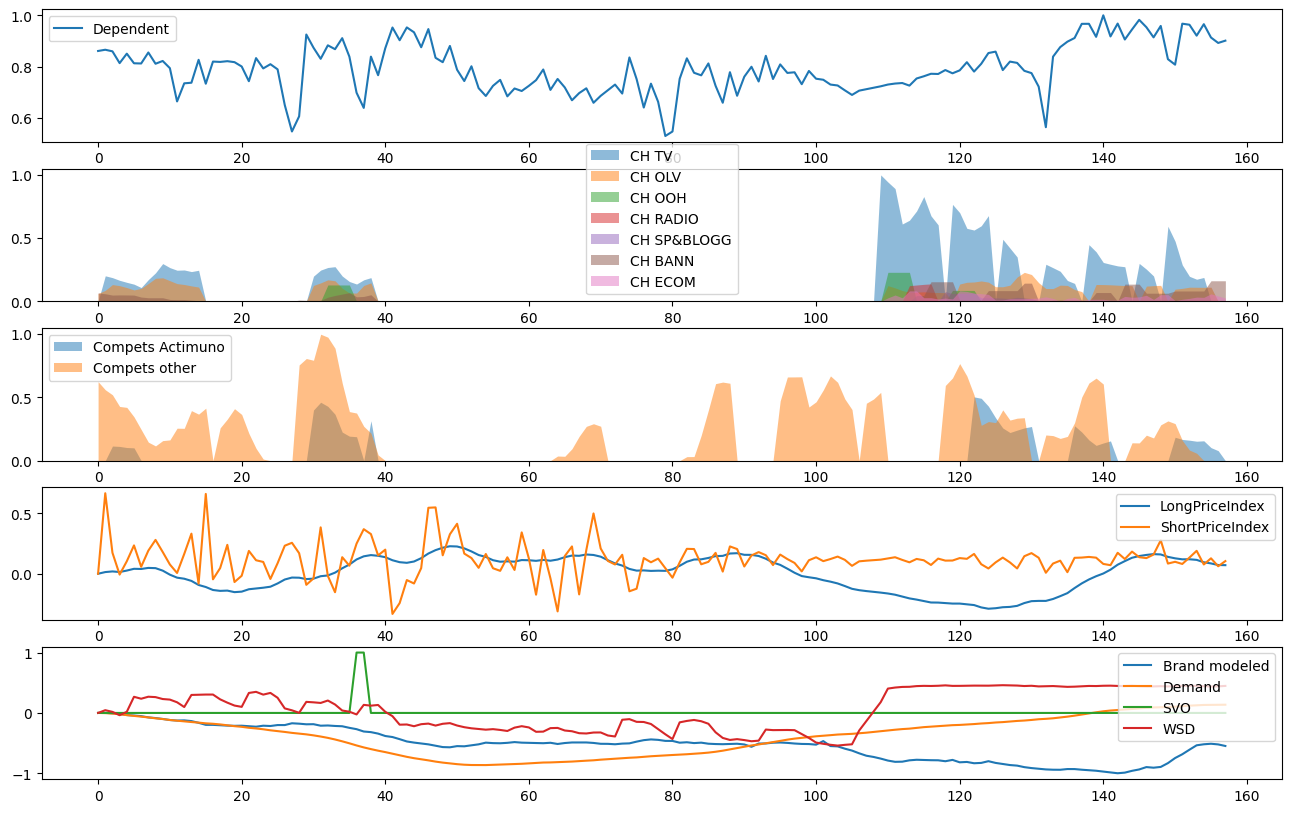

In [86]:
m = Modeller().PrepNoFit(spec_new, data)
m.PlotInputs()

In [119]:
m = Modeller().Fit(spec_new, data)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [120]:
m.model.mcmc.get_samples().keys()

dict_keys(['alpha Own media', 'base', 'base_drift_scale', 'base_init', 'beta Competitors media', 'beta Other structural', 'beta Own media', 'beta Pricing', 'gamma Own media', 'media', 'noise_scale', 'non-media', 'raw beta Competitors media', 'raw beta Other structural', 'raw beta Own media', 'raw beta Pricing', 'retention Competitors media', 'retention Own media', 'seasonal', 'seasonality_betas'])

In [121]:
m.model.mcmc.get_samples()['beta Own media'].shape

(4000, 7)

<Axes: ylabel='Count'>

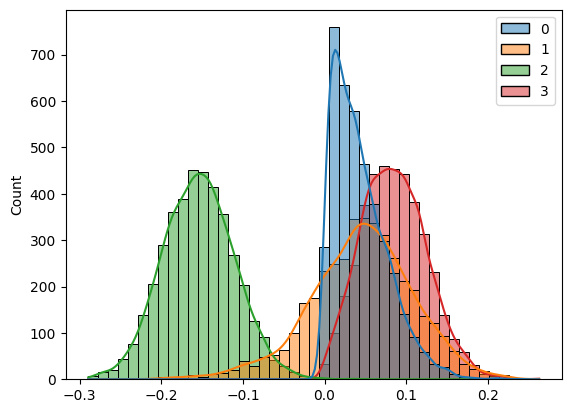

In [122]:
sns.histplot(m.model.mcmc.get_samples()['beta Other structural'], kde=True)

In [123]:
m.SitesNames()

dict_keys(['alpha Own media', 'base', 'base_drift_scale', 'base_init', 'beta Competitors media', 'beta Other structural', 'beta Own media', 'beta Pricing', 'gamma Own media', 'media', 'noise_scale', 'non-media', 'raw beta Competitors media', 'raw beta Other structural', 'raw beta Own media', 'raw beta Pricing', 'retention Competitors media', 'retention Own media', 'seasonal', 'seasonality_betas'])

In [93]:
smpl = m.model.SampleModel(m.X)

In [161]:
[n['column'] for n in spec_new['X'][1]['variables']]

['Compets Actimuno', 'Compets other']

In [132]:
decomp = m.GetDecomposition()

In [134]:
decomp.columns

MultiIndex([(             'base',                  'base'),
            (        'Own media',                    'TV'),
            (        'Own media',                   'OLV'),
            (        'Own media',                   'OOH'),
            (        'Own media',                 'Radio'),
            (        'Own media',   'Projects & bloggers'),
            (        'Own media',               'Banners'),
            (        'Own media',                 'E-com'),
            ('Competitors media',          'Actimuno ads'),
            ('Competitors media', 'Other competitors ads'),
            (          'Pricing',            'Price long'),
            (          'Pricing',           'Price short'),
            ( 'Other structural',                 'Brand'),
            ( 'Other structural',                'Demand'),
            ( 'Other structural',                   'SVO'),
            ( 'Other structural',                   'WSD'),
            (                'y',       

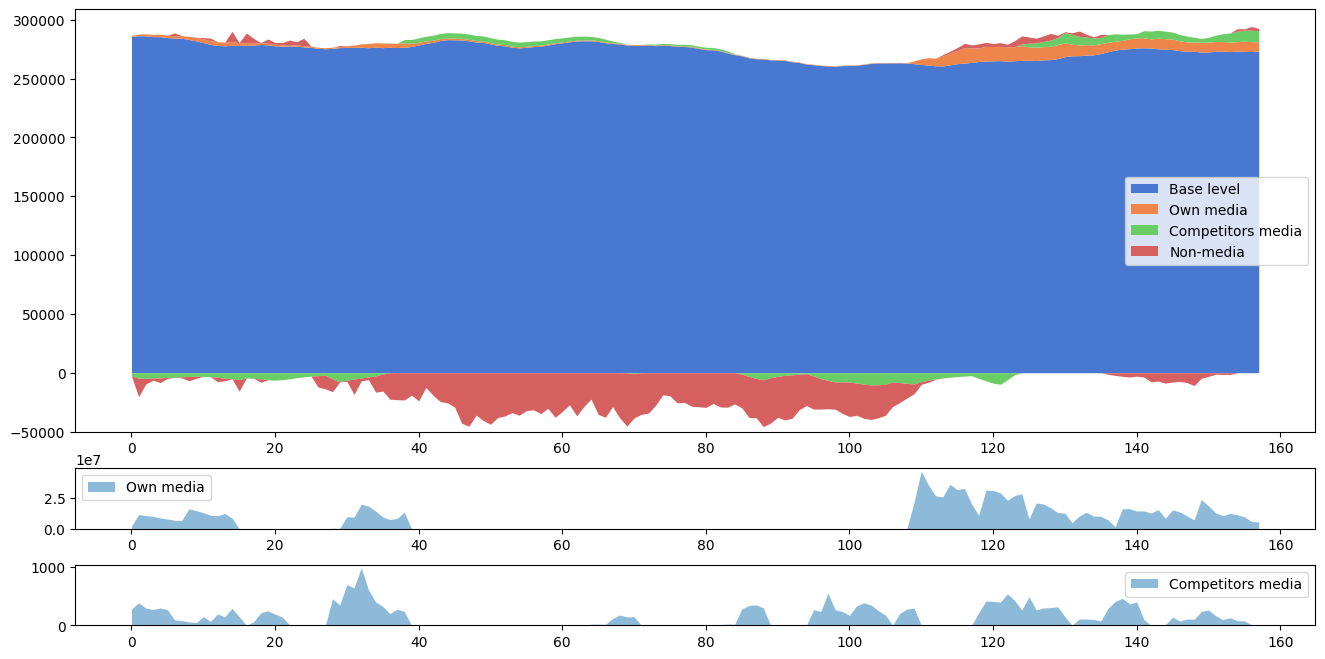

In [169]:
decomposition_spec = {
    "Base level": 'base',
    'Own media': 'Own media', 
    'Competitors media': 'Competitors media',
    'Non-media': [
            (          'Pricing',            'Price long'),
            (          'Pricing',           'Price short'),
            ( 'Other structural',                 'Brand'),
            ( 'Other structural',                'Demand'),
            ( 'Other structural',                   'WSD')
    ]
}

media_spec = {
    "Own media": {
        "Own media": ['CH TV', 'CH OLV', 'CH OOH', 'CH RADIO', 'CH SP&BLOGG', 'CH BANN', 'CH ECOM'],
    },
    "Competitors media": {
         "Competitors media": ['Compets Actimuno', 'Compets other'], 
    }
}

m.PlotDecomposition(decomposition_spec, media_spec)

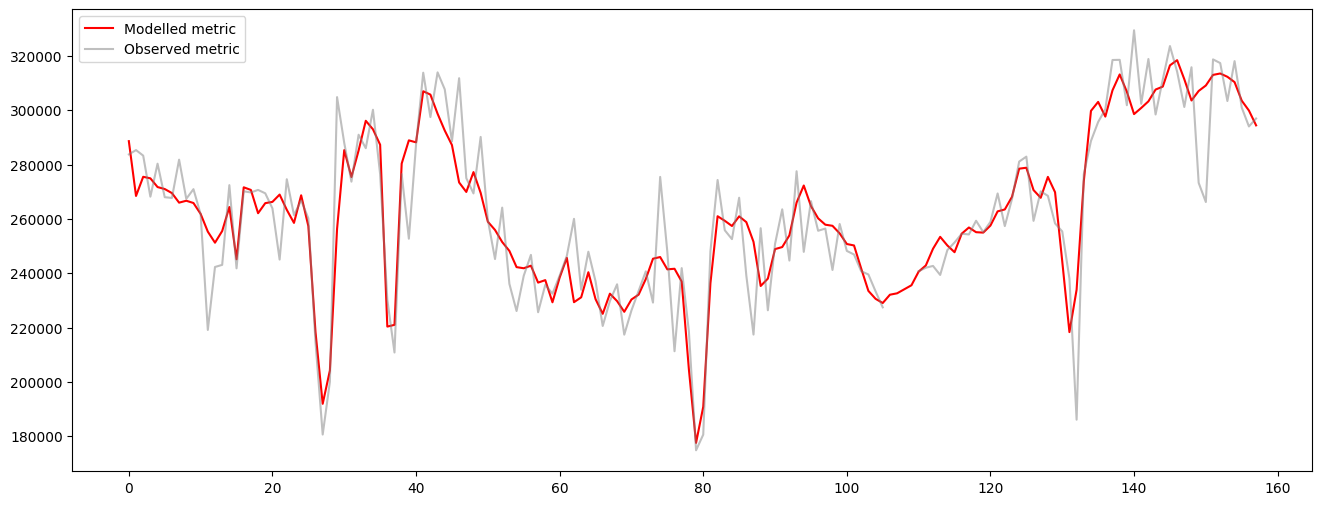

In [130]:
m.PlotFit()